In [1]:
import cv2,os

data_path=r'C:\Users\Dell\Desktop\Shojeb ML Projects\CNN3\dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [2]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [3]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [4]:
new_target.shape

(1376, 2)

In [9]:
np.save('images.npy',data)
np.save('lables.npy',new_target)

In [14]:
import numpy as np
data=np.load(r"C:\Users\Dell\Desktop\Shojeb ML Projects\CNN3\images.npy")
new_target=np.load(r"C:\Users\Dell\Desktop\Shojeb ML Projects\CNN3\lables.npy")

In [15]:
data.shape

(1376, 100, 100, 1)

In [16]:
data.shape[1:]

(100, 100, 1)

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       2000      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                    

In [19]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [20]:
train_data.shape

(1238, 100, 100, 1)

In [21]:
train_target.shape

(1238, 2)

In [22]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=30,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/30
31/31 [==============================] - ETA: 0s - loss: 0.6800 - accuracy: 0.5687

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


31/31 [==============================] - 69s 2s/step - loss: 0.6800 - accuracy: 0.5687 - val_loss: 0.5446 - val_accuracy: 0.7500
Epoch 2/30
31/31 [==============================] - ETA: 0s - loss: 0.5168 - accuracy: 0.7465

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


31/31 [==============================] - 63s 2s/step - loss: 0.5168 - accuracy: 0.7465 - val_loss: 0.3881 - val_accuracy: 0.8548
Epoch 3/30
31/31 [==============================] - ETA: 0s - loss: 0.3156 - accuracy: 0.8747

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


31/31 [==============================] - 63s 2s/step - loss: 0.3156 - accuracy: 0.8747 - val_loss: 0.3216 - val_accuracy: 0.8911
Epoch 4/30
31/31 [==============================] - ETA: 0s - loss: 0.2389 - accuracy: 0.9131

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


31/31 [==============================] - 63s 2s/step - loss: 0.2389 - accuracy: 0.9131 - val_loss: 0.2524 - val_accuracy: 0.9032
Epoch 5/30
31/31 [==============================] - ETA: 0s - loss: 0.1550 - accuracy: 0.9475

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


31/31 [==============================] - 61s 2s/step - loss: 0.1550 - accuracy: 0.9475 - val_loss: 0.2424 - val_accuracy: 0.9113
Epoch 6/30
31/31 [==============================] - ETA: 0s - loss: 0.1129 - accuracy: 0.9596

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


31/31 [==============================] - 61s 2s/step - loss: 0.1129 - accuracy: 0.9596 - val_loss: 0.2411 - val_accuracy: 0.8992
Epoch 7/30
31/31 [==============================] - ETA: 0s - loss: 0.0975 - accuracy: 0.9667

INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


31/31 [==============================] - 62s 2s/step - loss: 0.0975 - accuracy: 0.9667 - val_loss: 0.1806 - val_accuracy: 0.9274
Epoch 8/30
31/31 [==============================] - 60s 2s/step - loss: 0.0706 - accuracy: 0.9798 - val_loss: 0.1872 - val_accuracy: 0.9355
Epoch 9/30
31/31 [==============================] - 60s 2s/step - loss: 0.0493 - accuracy: 0.9818 - val_loss: 0.3862 - val_accuracy: 0.8790
Epoch 10/30
31/31 [==============================] - 63s 2s/step - loss: 0.0889 - accuracy: 0.9626 - val_loss: 0.1974 - val_accuracy: 0.9435
Epoch 11/30
31/31 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.9838

INFO:tensorflow:Assets written to: model-011.model\assets


INFO:tensorflow:Assets written to: model-011.model\assets


31/31 [==============================] - 70s 2s/step - loss: 0.0637 - accuracy: 0.9838 - val_loss: 0.1786 - val_accuracy: 0.9315
Epoch 12/30
31/31 [==============================] - 66s 2s/step - loss: 0.0577 - accuracy: 0.9758 - val_loss: 0.1834 - val_accuracy: 0.9516
Epoch 13/30
31/31 [==============================] - 62s 2s/step - loss: 0.0416 - accuracy: 0.9848 - val_loss: 0.1896 - val_accuracy: 0.9355
Epoch 14/30
31/31 [==============================] - 63s 2s/step - loss: 0.0515 - accuracy: 0.9798 - val_loss: 0.4631 - val_accuracy: 0.8306
Epoch 15/30
31/31 [==============================] - 61s 2s/step - loss: 0.0514 - accuracy: 0.9859 - val_loss: 0.1896 - val_accuracy: 0.9435
Epoch 16/30
31/31 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9939

INFO:tensorflow:Assets written to: model-016.model\assets


INFO:tensorflow:Assets written to: model-016.model\assets


31/31 [==============================] - 61s 2s/step - loss: 0.0200 - accuracy: 0.9939 - val_loss: 0.1536 - val_accuracy: 0.9476
Epoch 17/30
31/31 [==============================] - 61s 2s/step - loss: 0.0497 - accuracy: 0.9869 - val_loss: 0.1915 - val_accuracy: 0.9556
Epoch 18/30
31/31 [==============================] - 66s 2s/step - loss: 0.0236 - accuracy: 0.9939 - val_loss: 0.1797 - val_accuracy: 0.9597
Epoch 19/30
31/31 [==============================] - 63s 2s/step - loss: 0.0218 - accuracy: 0.9919 - val_loss: 0.3249 - val_accuracy: 0.9032
Epoch 20/30
31/31 [==============================] - 62s 2s/step - loss: 0.0401 - accuracy: 0.9879 - val_loss: 0.1913 - val_accuracy: 0.9516
Epoch 21/30
31/31 [==============================] - 59s 2s/step - loss: 0.0179 - accuracy: 0.9949 - val_loss: 0.1879 - val_accuracy: 0.9476
Epoch 22/30
31/31 [==============================] - 59s 2s/step - loss: 0.0101 - accuracy: 0.9949 - val_loss: 0.2643 - val_accuracy: 0.9315
Epoch 23/30
31/31 [======

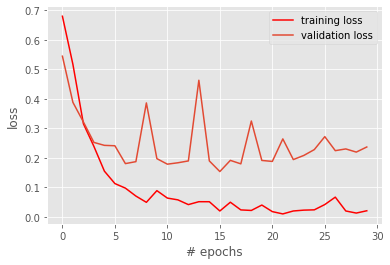

In [24]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

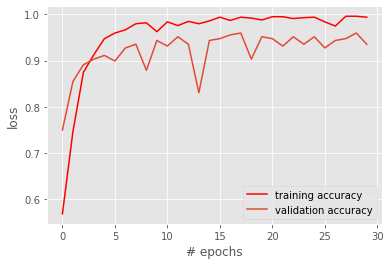

In [25]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [3]:
import pickle
pickle.dump(r"C:\Users\Dell\Desktop\Shojeb ML Projects\CNN3\model-016.model",open('mask.pkl','wb'))


In [1]:
from keras.models import load_model
import cv2
import numpy as np



from pygame import mixer
mixer.init()
sound = mixer.Sound(r"C:\Users\Dell\Desktop\Shojeb ML Projects\CNN3\FaceMask_detection_alarm.wav")



model = load_model('model-016.model')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(0)


labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}
  

while(True):

    ret,frame=cap.read()
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),color_dict[label],4)
        cv2.rectangle(frame,(x,y-40),(x+w,y),color_dict[label],4)
        cv2.putText(frame, labels_dict[label], (x, y-10),cv2.FONT_ITALIC, 1,(255,255,255),4)
        
        if(labels_dict[label] =='MASK'):
            print("No Beep")
        elif(labels_dict[label] =='NO MASK'):
                sound.play()
                print("Beep") 
        
    cv2.imshow('Mask Detection App',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()




pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
1/1 [==============================] - 0s 259ms/step
Beep
1/1 [==============================] - 0s 76ms/step
Beep
1/1 [==============================] - 0s 65ms/step
Beep
1/1 [==============================] - 0s 62ms/step
Beep
1/1 [==============================] - 0s 48ms/step
Beep
1/1 [==============================] - 0s 50ms/step
Beep
1/1 [==============================] - 0s 47ms/step
Beep
1/1 [==============================] - 0s 54ms/step
Beep
1/1 [==============================] - 0s 50ms/step
Beep
1/1 [==============================] - 0s 49ms/step
Beep
1/1 [==============================] - 0s 53ms/step
Beep
1/1 [==============================] - 0s 49ms/step
Beep
1/1 [==============================] - 0s 50ms/step
Beep
1/1 [==============================] - 0s 48ms/step
Beep
1/1 [==============================] - 0s 49ms/step
Beep
1/1 [===========================